In [1]:
from aleatory.processes import Vasicek
import numpy as np
from matplotlib import pyplot as plt


   -------------------- ------------------- 1/2 [aleatory]
   -------------------- ------------------- 1/2 [aleatory]
   -------------------- ------------------- 1/2 [aleatory]
   -------------------- ------------------- 1/2 [aleatory]
   -------------------- ------------------- 1/2 [aleatory]
   ---------------------------------------- 2/2 [aleatory]



In [2]:
vasicek = Vasicek(theta=3, mu=0.05, sigma=0.25, initial=0.03, T=1.0, rng=None)

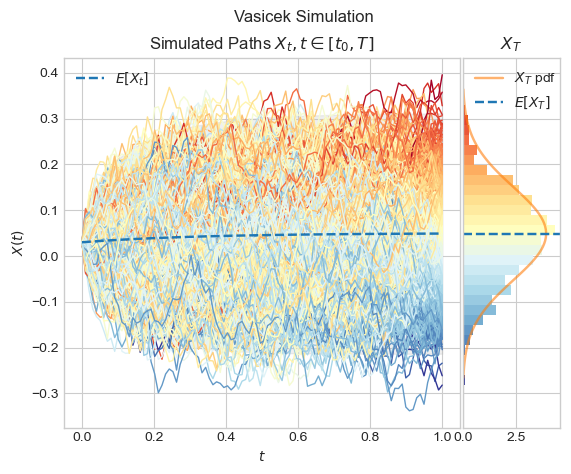

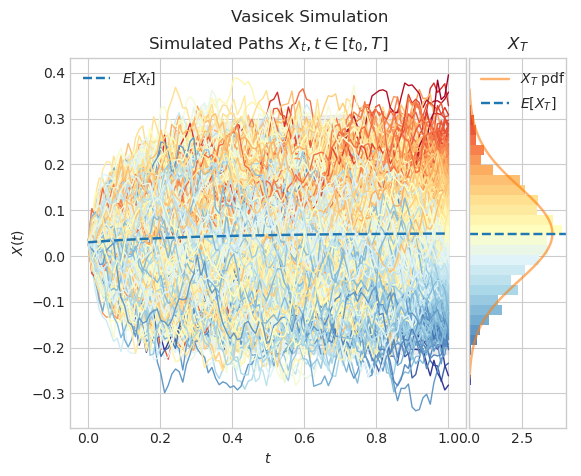

In [3]:
vasicek.draw(n=100,N=1000, marginal = True, envelope = True, title = 'Vasicek Simulation')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Vasicek Model
alpha = 3        # Speed of mean reversion
r_bar = 0.05     # Long-term mean interest rate
sigma = 0.25     # Volatility
r0 = 0.03        # Initial interest rate
T = 1            # Time horizon
N_vals = [10, 20, 50, 100, 200, 500, 1000, 3000, 5000, 10000,50000,100000]  # Different N values for convergence analysis
M = 10000        # Number of Monte Carlo paths

# Exact expectation function
def exact_expectation(t):
    return r0 * np.exp(-alpha * t) + r_bar * (1 - np.exp(-alpha * t))

# Euler-Maruyama simulation
def simulate_euler_maruyama(N, M):
    dt = T / N
    r_em = np.zeros((M, N + 1))
    r_em[:, 0] = r0
    Z = np.random.normal(0, 1, (M, N))  # Precompute normal variables

    for i in range(N):
        r_em[:, i+1] = r_em[:, i] + alpha * (r_bar - r_em[:, i]) * dt + sigma * np.sqrt(dt) * Z[:, i]

    return r_em

# Milstein simulation (same as Euler-Maruyama for Vasicek model)
def simulate_milstein(N, M):
    dt = T / N
    r_mil = np.zeros((M, N + 1))
    r_mil[:, 0] = r0
    Z = np.random.normal(0, 1, (M, N))  # Precompute normal variables

    for i in range(N):
        r_mil[:, i+1] = r_mil[:, i] + alpha * (r_bar - r_mil[:, i]) * dt + sigma * np.sqrt(dt) * Z[:, i]

    return r_mil

# Compute errors
max_abs_diff_exp_em = []
max_abs_diff_exp_mil = []
max_exp_abs_error_em = []
max_exp_abs_error_mil = []
exp_max_abs_error_em = []
exp_max_abs_error_mil = []
dt_values = []

for N in N_vals:
    dt = T / N
    dt_values.append(dt)

    # Simulate numerical solutions
    r_em = simulate_euler_maruyama(N, M)
    r_mil = simulate_milstein(N, M)

    # Compute exact expectation at final time T
    E_exact = exact_expectation(T)

    # Compute numerical expectations at final time T
    E_r_em = np.mean(r_em[:, -1])
    E_r_mil = np.mean(r_mil[:, -1])

    # Compute errors
    max_abs_diff_exp_em.append(np.abs(E_r_em - E_exact))
    max_abs_diff_exp_mil.append(np.abs(E_r_mil - E_exact))

    # Compute exact expectation at all time points for pathwise errors
    t_vals = np.linspace(0, T, N + 1)
    E_exact_path = exact_expectation(t_vals)

    # Compute pathwise errors
    max_exp_abs_error_em.append(np.max(np.mean(np.abs(r_em - E_exact_path), axis=0)))
    max_exp_abs_error_mil.append(np.max(np.mean(np.abs(r_mil - E_exact_path), axis=0)))

    exp_max_abs_error_em.append(np.mean(np.max(np.abs(r_em - E_exact_path), axis=1)))
    exp_max_abs_error_mil.append(np.mean(np.max(np.abs(r_mil - E_exact_path), axis=1)))

# Plot 1: Max absolute difference in expected values
plt.figure(figsize=(8, 6))
plt.loglog(dt_values, max_abs_diff_exp_em, 'o-', label="Max |E[SN] - E[S]| (E-M)")
plt.loglog(dt_values, max_abs_diff_exp_mil, 's-', label="Max |E[SN] - E[S]| (Milstein)")
plt.loglog(dt_values, [dt for dt in dt_values], 'k--', label="O(Δt)")
plt.xlabel("Δt (log scale)")
plt.ylabel("Error (log scale)")
plt.legend()
plt.title("Max Absolute Difference in Expected Values")
plt.grid()
plt.show()

# Plot 2: Max expected absolute error
plt.figure(figsize=(8, 6))
plt.loglog(dt_values, max_exp_abs_error_em, 'o-', label="Max E[|SN - S|] (E-M)")
plt.loglog(dt_values, max_exp_abs_error_mil, 's-', label="Max E[|SN - S|] (Milstein)")
plt.loglog(dt_values, [dt**0.5 for dt in dt_values], 'r--', label="O(√Δt)")
plt.xlabel("Δt (log scale)")
plt.ylabel("Error (log scale)")
plt.legend()
plt.title("Max Expected Absolute Error")
plt.grid()
plt.show()

# Plot 3: Expected max absolute error
plt.figure(figsize=(8, 6))
plt.loglog(dt_values, exp_max_abs_error_em, 'o-', label="E[Max |SN - S|] (E-M)")
plt.loglog(dt_values, exp_max_abs_error_mil, 's-', label="E[Max |SN - S|] (Milstein)")
plt.loglog(dt_values, [dt**0.5 for dt in dt_values], 'r--', label="O(√Δt)")
plt.xlabel("Δt (log scale)")
plt.ylabel("Error (log scale)")
plt.legend()
plt.title("Expected Max Absolute Error")
plt.grid()
plt.show()

MemoryError: Unable to allocate 763. MiB for an array with shape (10000, 10001) and data type float64

In [ ]:
# Quesition 6 part 1   

X0 = 0.03       # Initial interest rate
kappa = 2.0     # Mean reversion speed
theta = 0.05    # Long-term mean
sigma = 0.5     # Volatility

dt = 1/365      # Daily time step
M = 10000       # Number of Monte Carlo simulations

# Initialize the array to store the simulated paths
X = np.zeros((M, N + 1))
X[:, 0] = X0  # set initial value for each path

neg_counts = np.zeros(M, dtype=int)

# Simulate the CIR process using the Euler scheme
for i in range(N):
    dB = np.sqrt(dt) * np.random.normal(0,1,(M,N))
    
    # Compute the next time step:
    sqrt_term = np.sqrt(np.maximum(X[:, i], 0))
    X[:, i + 1] = (1 - kappa * dt) * X[:, i] + kappa * theta * dt + sigma * sqrt_term * dB[:,i]
    
    # Count the negative values
    neg_counts += (X[:, i + 1] < 0)

# Compute the average number of negative occurrences per path
avg_negatives = np.mean(neg_counts)
print("Average number of times per path that X goes negative:", avg_negatives)